In [1]:
import pandas as pd
import numpy as np

class Dataset:
    def __init__(self, df):
        self.df = df
        self.features = df.iloc[:,0:-1]
        self.target = df.iloc[:,-1]
        self.len = len(df)

    def treino_teste(self, fração=float):
        if fração < 1 and fração > 0:
            n_treino = int(fração * self.len)
            x_treino = self.features.iloc[0:n_treino,:] 
            x_teste = self.features.iloc[n_treino:,:]
            y_treino = self.target.iloc[0:n_treino]
            y_teste = self.target.iloc[n_treino:]

            return x_treino, x_teste, y_treino, y_teste
        else:
            raise ValueError('O tamanho do conjunto de treino deve ser uma fração entre 0 e 100% do dataset')

class RegressãoLinear:
    def __init__(self, modelo):
        self.modelo = modelo     

    def regressao_linear(self, X, y):
        if self.modelo == 'linalg':
            X = np.array(X)
            y = np.array(y)

            coluna = np.ones((X.shape[0], 1)) #adicionando coluna para calcular o beta_0
            X = np.hstack((X, coluna))

            XtX = np.dot(X.T, X)
            Xty = np.dot(X.T, y)

            XtX_inv = np.linalg.inv(XtX)

            betas = list(np.dot(XtX_inv, Xty))

            return list(betas)
        

        elif self.modelo == 'stats':
            if X.shape[1] > 1:
                raise NotImplementedError('O método não está disponível para modelos multivariados')
            
            else:
                x_medio = np.mean(X)
                y_medio = np.mean(y)

                aux_1 = np.sum((X - x_medio) * (y - y_medio))
                aux_2 = np.sum((X - x_medio) ** 2)
                beta = aux_1 / aux_2

                intercepto = y_medio - beta * x_medio

                return [beta, intercepto]


    def predição(self, X, betas=[]):
        if self.modelo == 'linalg':
            betas_ = betas[0:-1]
            X_array = np.array(X)
            betas_array = np.array(betas_)
            predições = np.dot(X_array, betas_array)+betas[-1] #Adicionando o bias (beta_0)
            return list(predições)

        elif self.modelo == 'stats':
            X_array = np.array(X)
            beta = float(betas[0])
            intercepto = float(betas[1]) 
            predições = X_array * beta + intercepto 
            return list(predições)
    

class Erro:
    def calcula_erro(self, y_real_i, y_pred_i):
        return abs(y_real_i - y_pred_i)


class Performance(Erro):
    #A classe Performance herda o método de calculo do erro porque seria necessário calcular esse parametro em diferentes métodos
    #Optei por utilizar herança pensando que se no futuro existir uma demanda que altere a forma com o erro é calculado,
    #bastaria alterar a classe erro
    #No fim, o intuito foi implementar o conceito de herança! Hahah!
    def __init__(self, metrica):
        self.metrica = metrica

    def performance(self, y_real, y_pred):
        if self.metrica == 'mae':
            metrica = 0
            for i in range(len(y_real)):
                erro = self.calcula_erro(y_real[i], y_pred[i]) 
                metrica = metrica + erro

            return metrica/(i+1)

        if self.metrica == 'mse':
            metrica = 0
            for i in range(len(y_real)):
                erro = self.calcula_erro(y_real[i], y_pred[i])**2
                metrica = metrica + erro
            
            return metrica/(i+1)
            

        if self.metrica == 'max':
            erro = 0
            for i in range(len(y_real)):
                erro_i = self.calcula_erro(y_real[i], y_pred[i])
                if erro_i > erro:
                    erro = erro_i
            
            return erro

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression


#Criando um dataset sintético usando sklearn datasets
n_samples = 10000
n_features = 10
X, y = make_regression(n_samples=n_samples, n_features=n_features, random_state=42, noise=25)


df = pd.DataFrame(data=X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['target'] = y+1000 #Adicionando um bias (beta_0 = 1000)

df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target
0,0.604453,-1.073702,-3.249764,-0.723497,-0.167870,1.921961,-0.112531,-0.150933,1.366808,-0.537862,924.004900
1,-1.111851,-2.281662,0.656806,-0.890985,-0.519026,-0.103128,1.097423,-0.390304,0.006925,-0.923429,921.414119
2,-0.164515,-1.474779,0.756642,-0.705804,-1.056270,0.773400,0.491814,-0.857172,0.959496,-0.365055,1060.903199
3,0.318549,2.377224,-0.968608,0.102883,0.085826,-1.342091,-0.063032,0.139537,-0.336186,0.191080,955.612444
4,0.822698,0.085764,0.010054,1.197242,0.177811,1.959245,0.457162,-0.264029,0.180327,1.275180,1350.416588
...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.606315,-1.714683,0.699367,-0.319087,-1.113487,-0.144619,-0.982486,-0.241412,0.553021,1.245979,935.672663
9996,-0.005730,-0.430793,-0.127216,0.326588,-1.188292,-0.284406,0.694813,-0.161663,-0.149463,0.365271,1048.620507
9997,0.318461,0.822413,-0.653701,-0.736001,-0.290235,-0.391913,-0.260030,0.961040,-0.709339,2.439255,1086.299472
9998,-0.255006,-0.807450,0.184368,0.164772,0.024477,-1.480830,0.960307,-0.005040,-0.141197,-0.149617,951.941077


In [3]:
dataset = Dataset(df)

X_treino, X_teste, y_treino, y_teste = dataset.treino_teste(0.7)
print(X_treino.shape)
print(X_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(7000, 10)
(3000, 10)
(7000,)
(3000,)


In [4]:
Regressão = RegressãoLinear('linalg')

betas_reg_linalg = Regressão.regressao_linear(X_treino, y_treino)
print(len(betas_reg_linalg))
betas_reg_linalg

11


[78.27236282685864,
 19.301191698796252,
 48.27474047115103,
 25.227987039400183,
 2.2105178520091844,
 55.89637124190195,
 82.71094271548701,
 9.27929643655933,
 28.97564933553214,
 68.24944229931386,
 1000.2087335385255]

In [5]:
predictions = Regressão.predição(X_teste, betas_reg_linalg)

Text(0, 0.5, 'Valores Reais')

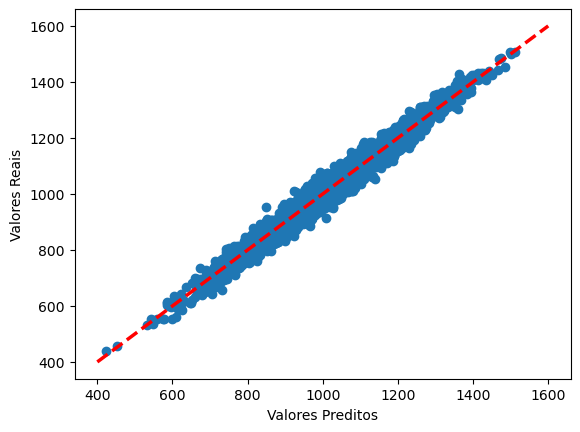

In [6]:
import matplotlib.pyplot as plt

x = np.linspace(400,1600,200)
plt.scatter(predictions, y_teste)
plt.plot(x,x, c='red', lw=2.5, ls='--')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')

In [7]:
#Criando um dataset sintético usando sklearn datasets
n_samples = 10000
n_features = 1
X, y = make_regression(n_samples=n_samples, n_features=n_features, random_state=42, noise=5)


df = pd.DataFrame(data=X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['feature_0'] = df['feature_0']*100
df['target'] = y+5 #Adicionando um bias (beta_0 = 5)

df

,feature_0,target
0,-71.657349,-12.245961
1,-84.144951,-29.081733
2,-27.667177,-5.693936
3,-1.901621,-5.895337
4,-14.451867,3.313337
...,...,...
9995,125.534978,39.900282
9996,-122.071243,-29.954570
9997,104.839989,33.197201
9998,-112.863451,-38.049854


In [8]:
dataset = Dataset(df)

X_treino, X_teste, y_treino, y_teste = dataset.treino_teste(0.7)
y_treino = np.array(y_treino).reshape(-1, 1)
y_teste = np.array(y_teste).reshape(-1, 1)

print(X_treino.shape)
print(X_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(7000, 1)
(3000, 1)
(7000, 1)
(3000, 1)


In [9]:
Regressão = RegressãoLinear('stats')

betas_reg_stats = Regressão.regressao_linear(X_treino, y_treino)

predição_stats = Regressão.predição(X_teste, betas_reg_stats)

c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Text(0, 0.5, 'Valores Reais')

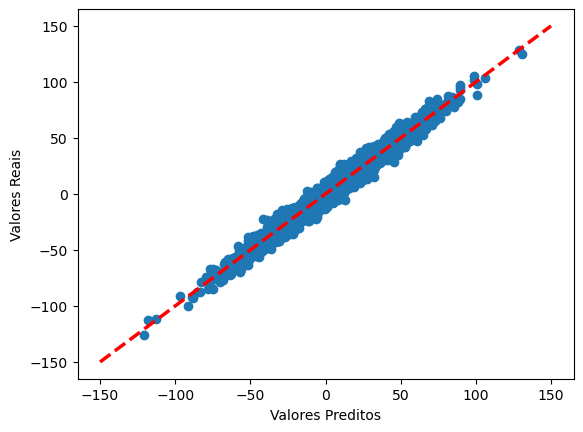

In [10]:
x = np.linspace(-150,150,100)

plt.scatter(predição_stats, y_teste)
plt.plot(x,x, c='red', lw=2.5, ls='--')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')

In [11]:
Regressão = RegressãoLinear('linalg')

betas_reg_linalg = Regressão.regressao_linear(X_treino, y_treino)

predição_linalg = Regressão.predição(X_teste, betas_reg_linalg)

Text(0, 0.5, 'Valores Reais')

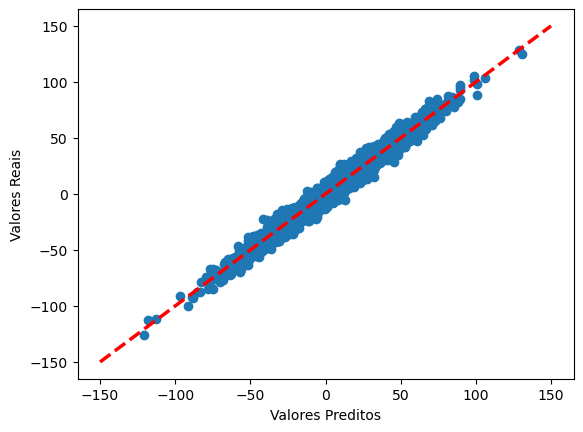

In [12]:
x = np.linspace(-150,150,100)

plt.scatter(predição_linalg, y_teste)
plt.plot(x,x, c='red', lw=2.5, ls='--')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')

Text(0, 0.5, 'Método Stats')

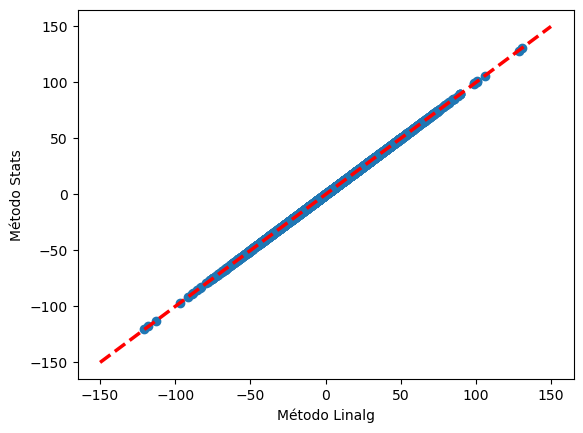

In [13]:
plt.scatter(predição_linalg, predição_stats)
plt.plot(x,x, c='red', lw=2.5, ls='--')
plt.xlabel('Método Linalg')
plt.ylabel('Método Stats')

In [14]:
mae = Performance('mae')
model_mae = mae.performance(predição_linalg, y_teste)
print(f'MAE: {model_mae.round(decimals=2)}')

mse = Performance('mse')
model_mse = mse.performance(predição_linalg, y_teste)
print(f'MSE: {model_mse.round(decimals=2)}')

max = Performance('max')
model_max = max.performance(predição_linalg, y_teste)
print(f'MAX: {model_max}')

MAE: [4.02]
MSE: [25.53]
MAX: [18.67209945]
